<a href="https://colab.research.google.com/github/aryan-at-ul/pytorch_tutorials/blob/main/perceptron_with_hidden_units.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import numpy as np 

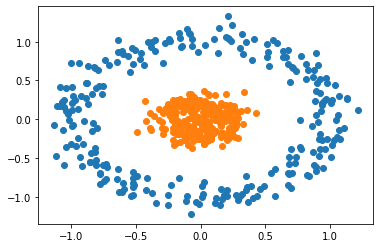

In [3]:
n_points = 500 

X, y = datasets.make_circles(n_samples = n_points,random_state = 123, noise = 0.1, factor = 0.2) # factor has to do something with circle sizes, inner is 20% of outer


def plot_scatter():
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])

plot_scatter()

In [12]:
x_data = torch.tensor(X)
y_data = torch.tensor(y).reshape(500,1)

In [14]:
class NN(nn.Module):
    def __init__(self,input,hidden_units,output):
        super().__init__()
        self.linear = nn.Linear(input,hidden_units)
        self.linear2 = nn.Linear(hidden_units,output)

    def forward(self,x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self,x):
        pred = self.forward(x)

        if pred >= .5:
            return 1
        else:
            return 0 


In [7]:
torch.manual_seed(1)

model = NN(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241],
        [-0.1455,  0.3597]], requires_grad=True), Parameter containing:
tensor([ 0.0983, -0.0866,  0.1961,  0.0349], requires_grad=True), Parameter containing:
tensor([[ 0.1826, -0.1949, -0.0365, -0.0450]], requires_grad=True), Parameter containing:
tensor([0.0725], requires_grad=True)]


In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)


In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
    pred = model.forward(x_data.float())
    loss =  criterion(pred,y_data.float())
    print(f"for epoch {i} loss is {loss.item()}")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

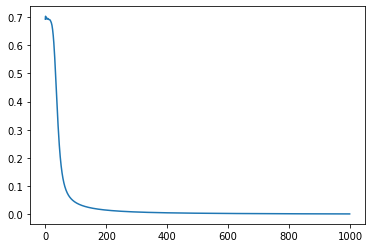

In [19]:
plt.plot(range(epochs),losses)

In [44]:
# this part is important 
def plot_decision_boundary():
    #this will be a countour, the centre cluster should have one type and outer cluster of another 
    x_span = np.linspace(min(X[:,0]),max(X[:,0]))
    y_span = np.linspace(min(X[:,1]),max(X[:,1]))
    xx,yy = np.meshgrid(x_span,y_span)
    XX = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
    preds = model.forward(XX)
    grid = preds.view(xx.shape).detach().numpy()
    plt.contourf(xx,yy,grid)
    plot_scatter()
    



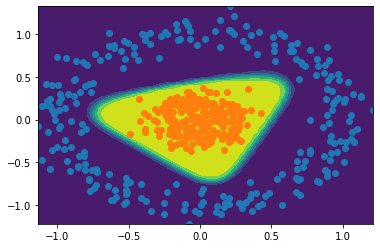

In [45]:
plot_decision_boundary()